# 2D Linear Regression Problem

In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
# Data - Input features are size, and room
X = np.array([[150,2], 
              [170, 3],
              [200, 4],
              [160, 2],
              [180, 3],
              [220, 5]
            ], dtype=float)

In [30]:
# prices of houses
y = np.array([200, 270, 350, 220, 240, 400], dtype=float)

In [31]:
# Let's predict the house prices using Linear Algebra, The prediction formula is
#ŷ = X.w + b # w is weight and b is bias value.

# There are a few ways to calculate the best value for weights like using Gradient descent, Normal equation etc. I am going to use Normal equation to achieve this 
#w=(X^TX)^{−1}X^Ty

In [32]:
#Let's solve this via NumPy lib
X_b = np.hstack([X, np.ones((X.shape[0], 1))])
print(np.hstack([X, np.ones((X.shape[0], 1))]))

[[150.   2.   1.]
 [170.   3.   1.]
 [200.   4.   1.]
 [160.   2.   1.]
 [180.   3.   1.]
 [220.   5.   1.]]


In [33]:
# Solve Normal equation: w=(X^TX)^{−1}X^Ty

w = np.linalg.inv(X_b.T @ X_b) @ (X_b.T @ y)
print("Weight vector (w1, w2, bias):", w)

# In this example: w1 is weight for size, w2 for rooms and bias

Weight vector (w1, w2, bias): [ 0.20454545 61.36363636 48.86363636]


In [34]:
predicted_y = X_b @ w
print(f"Predictions: {predicted_y}")

Predictions: [202.27272727 267.72727273 335.22727273 204.31818182 269.77272727
 400.68181818]


## Evaluate and Plot

## Mean Squared error

Average of squared differences between actual and predicted values.

In [36]:
mse = np.mean((predicted_y-y)**2)
print("Mean Squared Error:", mse)

Mean Squared Error: 226.8939393939394


## Plot Actual vs Predicted

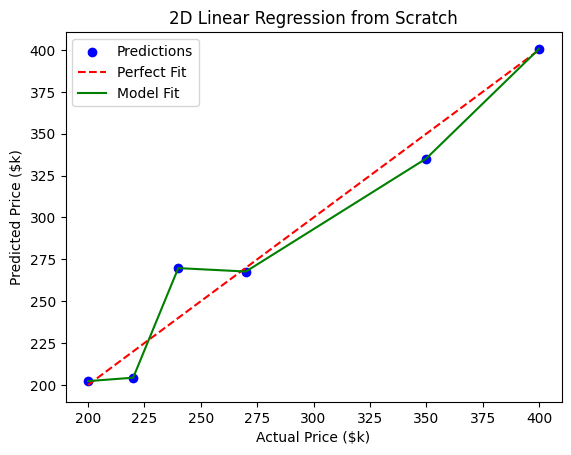

In [38]:
plt.scatter(y, predicted_y, color="blue", label= "Predictions")
sorted_idx = np.argsort(y)
plt.plot([y.min(), y.max()], [y.min(), y.max()], "r--", label="Perfect Fit")
plt.plot(y[sorted_idx], predicted_y[sorted_idx], "g-", label="Model Fit")
plt.xlabel("Actual Price ($k)")
plt.ylabel("Predicted Price ($k)")
plt.title("2D Linear Regression from Scratch")
plt.legend()
plt.show()